In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = {
    "Round of 64":[240, 180, 200, 200], 
    "Round of 32":[140, 140, 180, 180], 
    "Round of 16":[120,  80, 160, 160], 
    "Elite 8":    [80 ,   0, 0  , 0  ], 
    "Final 4":    [0  ,   0, 0  ,   0], 
    "Final":      [0  ,   0, 0  , 0  ],
    "Percentile": [63 ,  18, 54 , 54 ]
}
rows = [
    "Random - Seed Weighted",
    "Random - BPI Weighted",
    "Seeded Fallback",
    "SVM"
]

df = pd.DataFrame(data, index=rows)

df["Total"] = df.iloc[:, :6].sum(1)

## Overall Data

In [8]:
df.sort_values(["Total"], ascending = False)

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final,Percentile,Total
Random - Seed Weighted,240,140,120,80,0,0,63,580
Seeded Fallback,200,180,160,0,0,0,54,540
SVM,200,180,160,0,0,0,54,540
Random - BPI Weighted,180,140,80,0,0,0,18,400


## Round Accuracy

Note that this is not exactly the accuracy for later rounds since errors propagate. Thus even if an error was made in a previous round, the model can still get points in later rounds, so while the matchup it originally made the prediction based off was invalid, it was still "correct" in a sense.

In [9]:
accuracy = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]] * 100 / 320
accuracy

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final
Random - Seed Weighted,75.00,43.75,37.5,25.0,0.0,0.0
Random - BPI Weighted,56.25,43.75,25.0,0.0,0.0,0.0
Seeded Fallback,62.50,56.25,50.0,0.0,0.0,0.0
SVM,62.50,56.25,50.0,0.0,0.0,0.0


## Cumulative Scores

<AxesSubplot:title={'center':'2021 Cumulative Scores Per Round'}, xlabel='Round'>

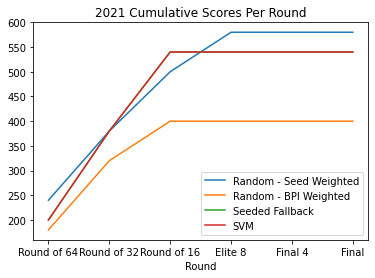

In [10]:
cumulative = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]].cumsum(1)
cumulative = cumulative.transpose()
cumulative.index.name = "Round"
cumulative.plot(title="2021 Cumulative Scores Per Round")